# 1. Data Preparation

### Import libraries

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

In [2]:
np.random.seed(12049)

In [3]:
def get_classes(data_path, classes, data):
    print(f"---- {data} ----")
    knee_severity = {}
    count = 0

    for i in range(len(classes)):
        imgs = os.listdir(os.path.join(data_path, str(i)))
        knee_severity[i] = imgs
        count += len(imgs)

    for k, v in knee_severity.items():
        print(
            f"Grade {k} - {classes[k]}: {len(v)} images, {round((len(v) * 100) / count, 2)}%"
        )

    return knee_severity


def plot_classes(dict_classes, data_path, classes, data):
    for k, v in dict_classes.items():
        print(f"{data} - {classes[k]}")
        plt.figure(figsize=(10, 25))
        for i in range(5):
            img_path = os.path.join(data_path, str(k), v[i])
            img = tf.keras.preprocessing.image.load_img(img_path)
            plt.subplot(1, 5, 1 + i, xticks=[], yticks=[])
            plt.imshow(img)
            plt.title(f"Grade {k}")
        plt.show()

## Load data

In [4]:
# Specify the path and name of the file
file_path = r'C:\Users\jagad\Desktop\junior\all files\output.txt'


# Open the file in read mode and read the contents into a list
with open(file_path, 'r') as file:
    content_list = file.readlines()

# Remove newline characters from each element
class_names = [line.strip() for line in content_list]

print(class_names)



['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [16]:
base_dir = r"C:\Users\jagad\Desktop\junior\all files\dataset"
train_path = os.path.join(base_dir, 'train')
valid_path = os.path.join(base_dir, 'val')
test_path = os.path.join(base_dir, 'test')

In [17]:
train_data = get_classes(train_path, class_names, 'Train')
valid_data = get_classes(valid_path, class_names, 'Valid')
tests_data = get_classes(test_path, class_names, 'Test')

---- Train ----
Grade 0 - actinic keratosis: 78 images, 5.53%
Grade 1 - basal cell carcinoma: 235 images, 16.65%
Grade 2 - dermatofibroma: 66 images, 4.68%
Grade 3 - melanoma: 272 images, 19.28%
Grade 4 - nevus: 223 images, 15.8%
Grade 5 - pigmented benign keratosis: 286 images, 20.27%
Grade 6 - seborrheic keratosis: 48 images, 3.4%
Grade 7 - squamous cell carcinoma: 118 images, 8.36%
Grade 8 - vascular lesion: 85 images, 6.02%
---- Valid ----
Grade 0 - actinic keratosis: 26 images, 5.47%
Grade 1 - basal cell carcinoma: 79 images, 16.63%
Grade 2 - dermatofibroma: 23 images, 4.84%
Grade 3 - melanoma: 91 images, 19.16%
Grade 4 - nevus: 75 images, 15.79%
Grade 5 - pigmented benign keratosis: 96 images, 20.21%
Grade 6 - seborrheic keratosis: 16 images, 3.37%
Grade 7 - squamous cell carcinoma: 40 images, 8.42%
Grade 8 - vascular lesion: 29 images, 6.11%
---- Test ----
Grade 0 - actinic keratosis: 26 images, 5.52%
Grade 1 - basal cell carcinoma: 78 images, 16.56%
Grade 2 - dermatofibroma: 22

## Visualize data

### Train data

Train data - actinic keratosis


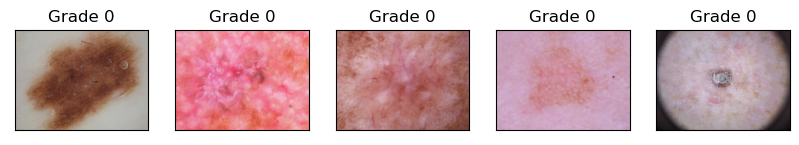

Train data - basal cell carcinoma


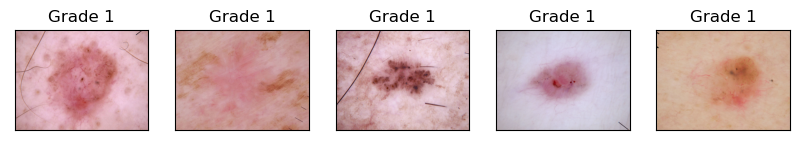

Train data - dermatofibroma


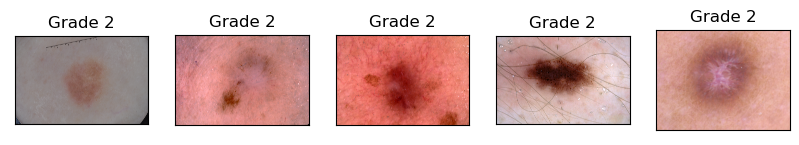

Train data - melanoma


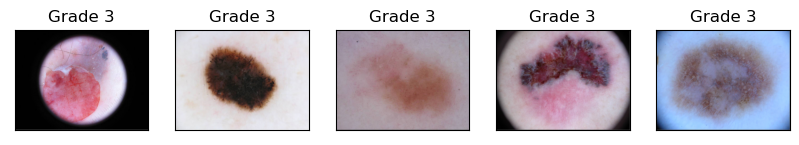

Train data - nevus


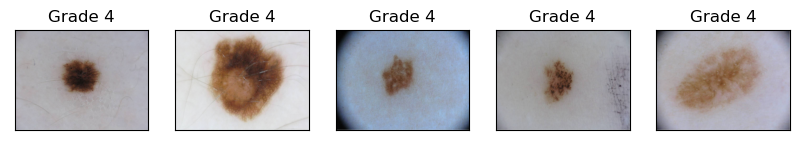

Train data - pigmented benign keratosis


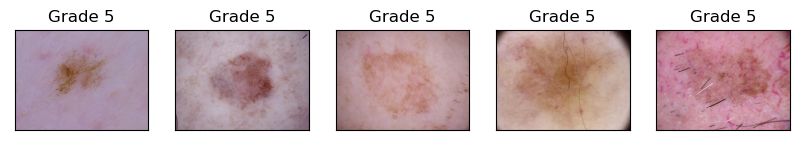

Train data - seborrheic keratosis


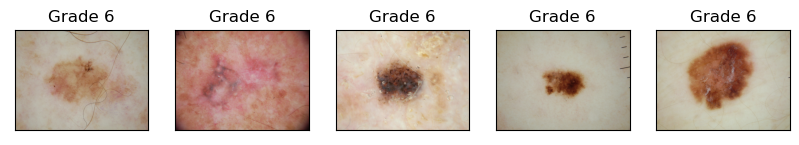

Train data - squamous cell carcinoma


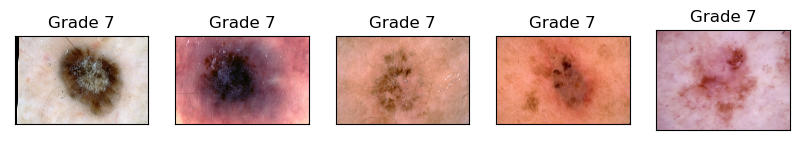

Train data - vascular lesion


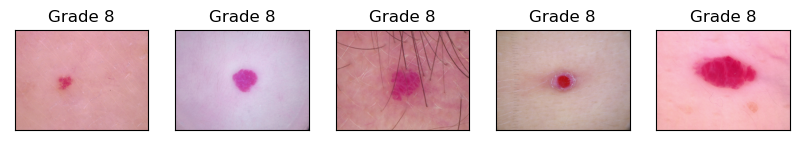

In [18]:
plot_classes(train_data, train_path, class_names, 'Train data')

### Valid data

Valid data - actinic keratosis


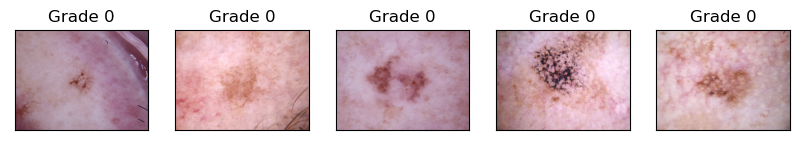

Valid data - basal cell carcinoma


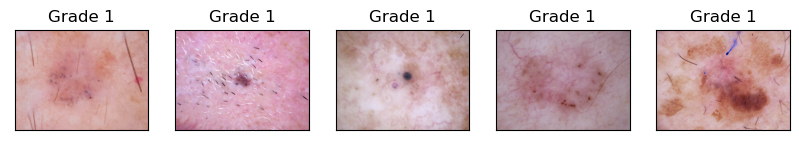

Valid data - dermatofibroma


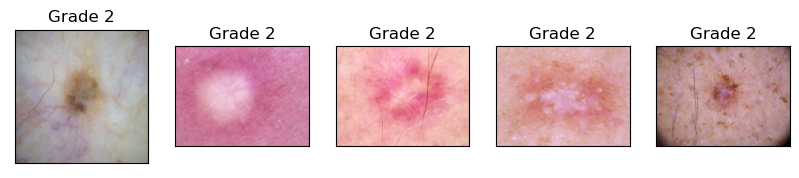

Valid data - melanoma


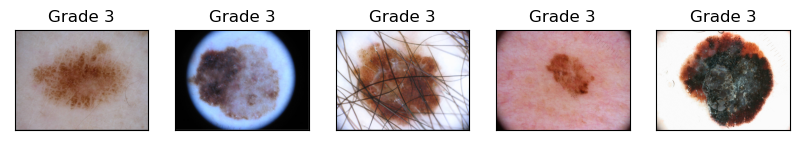

Valid data - nevus


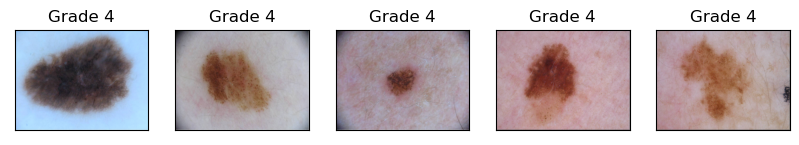

Valid data - pigmented benign keratosis


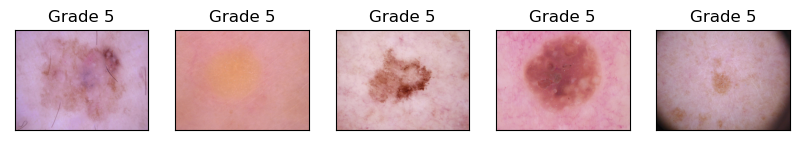

Valid data - seborrheic keratosis


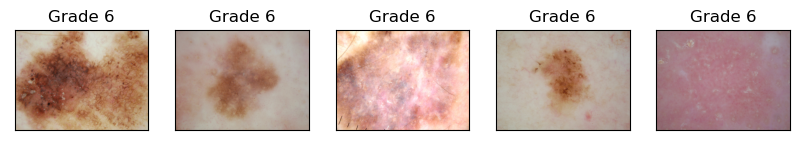

Valid data - squamous cell carcinoma


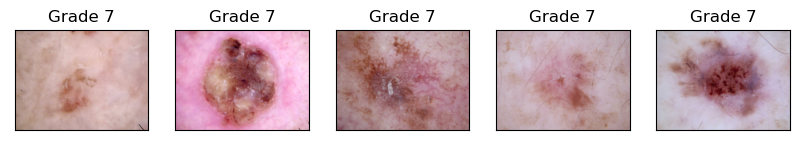

Valid data - vascular lesion


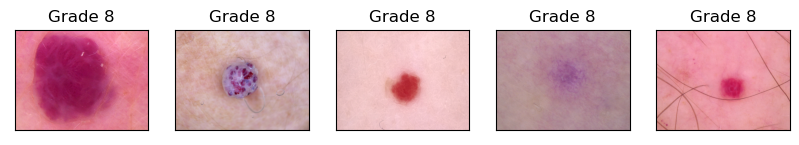

In [19]:
plot_classes(valid_data, valid_path, class_names, 'Valid data')

### Test data

Test data - actinic keratosis


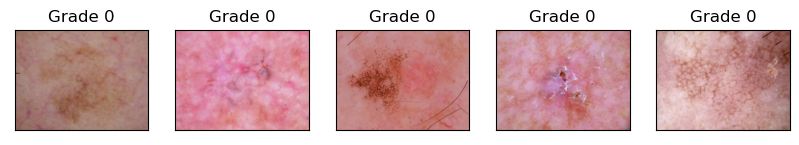

Test data - basal cell carcinoma


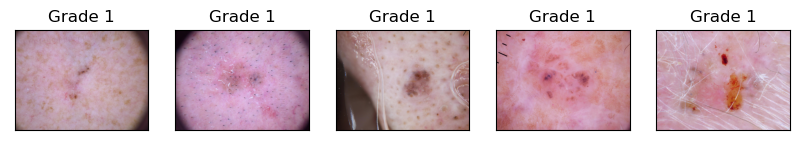

Test data - dermatofibroma


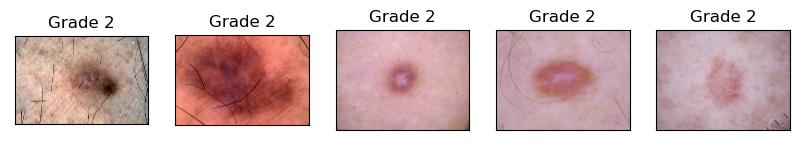

Test data - melanoma


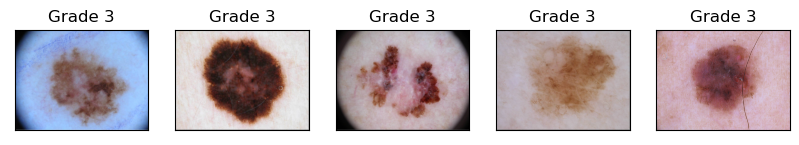

Test data - nevus


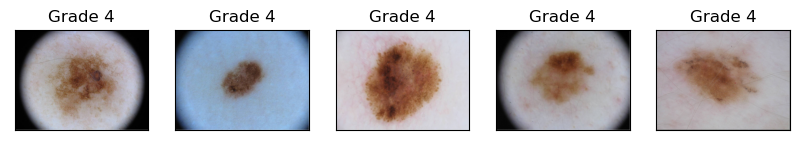

Test data - pigmented benign keratosis


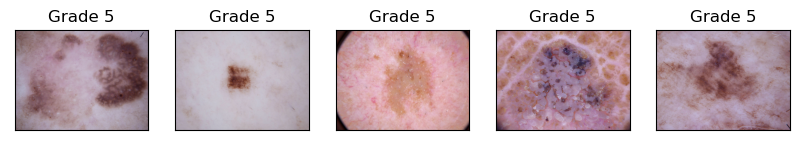

Test data - seborrheic keratosis


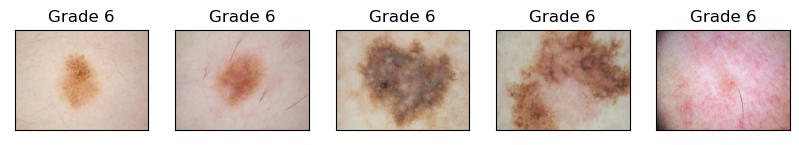

Test data - squamous cell carcinoma


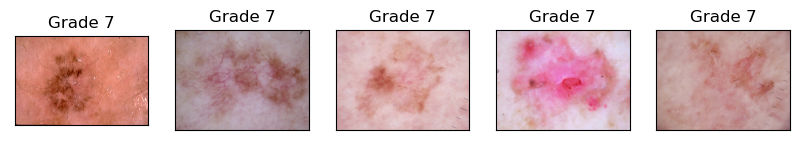

Test data - vascular lesion


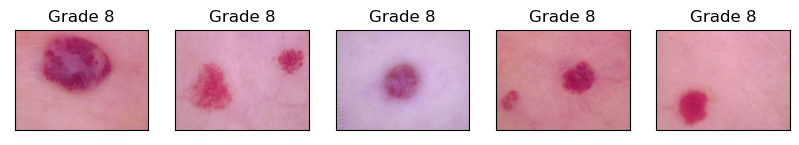

In [20]:
plot_classes(tests_data, test_path, class_names, 'Test data')

## Image Data Generator Examples

#### brightness_range

Found 1411 images belonging to 9 classes.


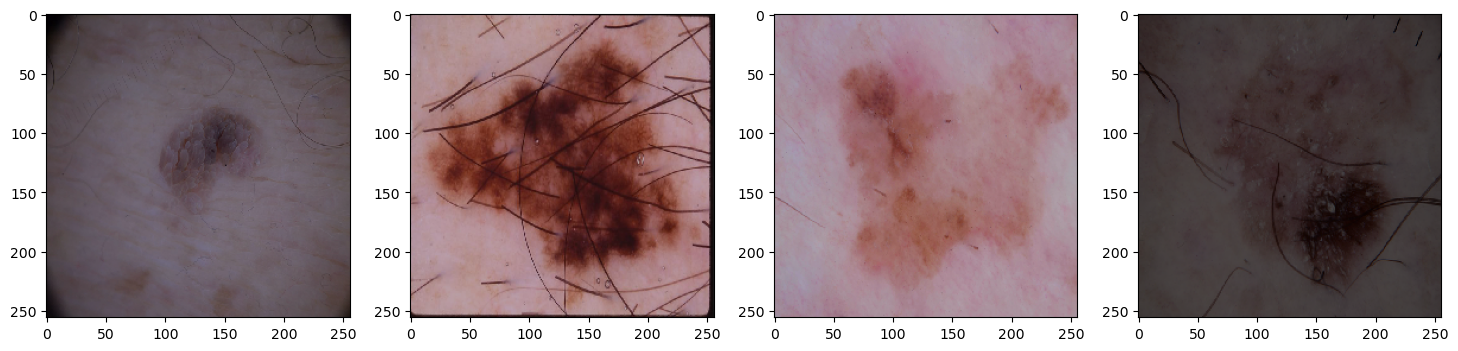

In [21]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=[0.3, 0.8]
)
imagegen = datagen.flow_from_directory(train_path, batch_size=1)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18, 18))
for row in rows:
    row.imshow(imagegen.next()[0][0].astype("uint8"))
plt.show()

#### width_shift_range

Found 1411 images belonging to 9 classes.


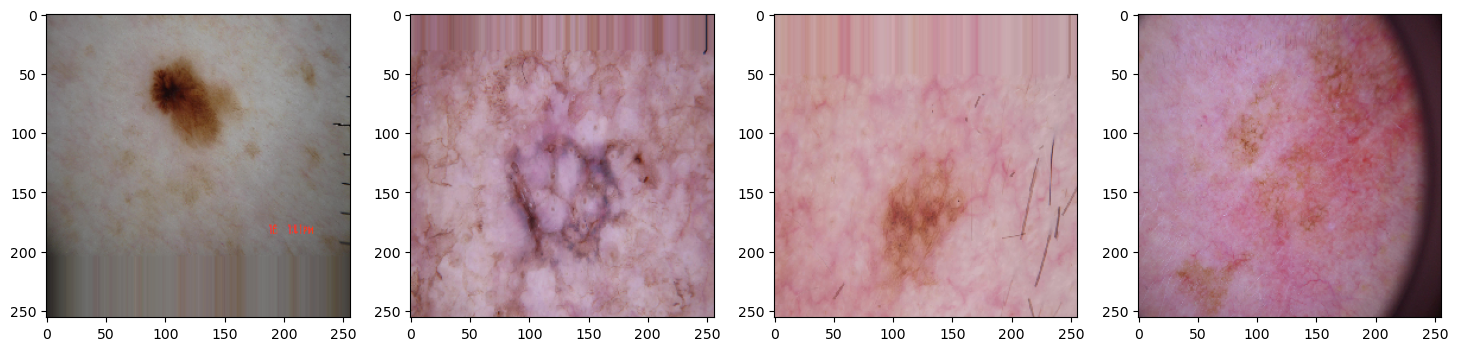

In [22]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-50,0,50,30,-30]
)
imagegen = datagen.flow_from_directory(train_path, batch_size=5)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(imagegen.next()[0][0].astype('uint8'))
plt.show()

#### zoom_range

Found 1411 images belonging to 9 classes.


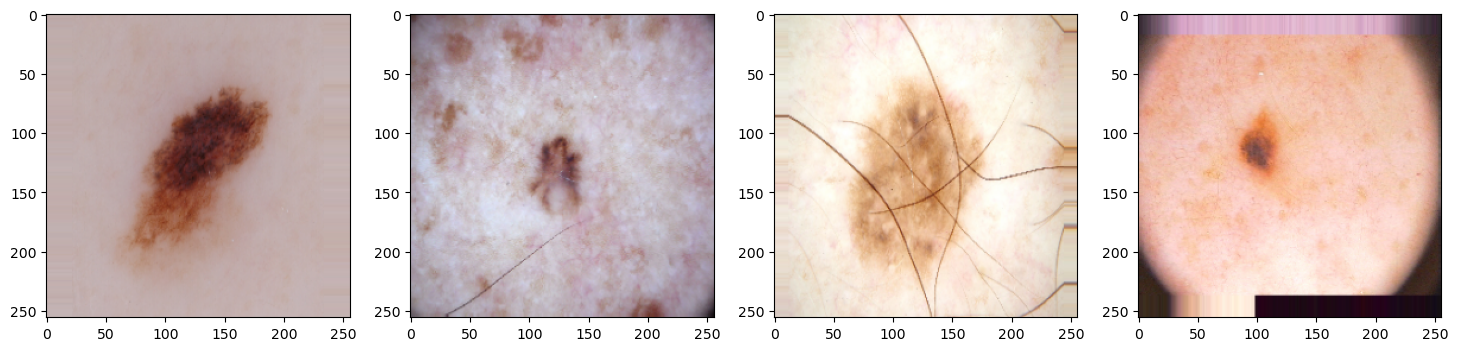

In [23]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2
)
imagegen = datagen.flow_from_directory(train_path, batch_size=1)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(imagegen.next()[0][0].astype('uint8'))
plt.show()

#### horizontal_flip

Found 1411 images belonging to 9 classes.


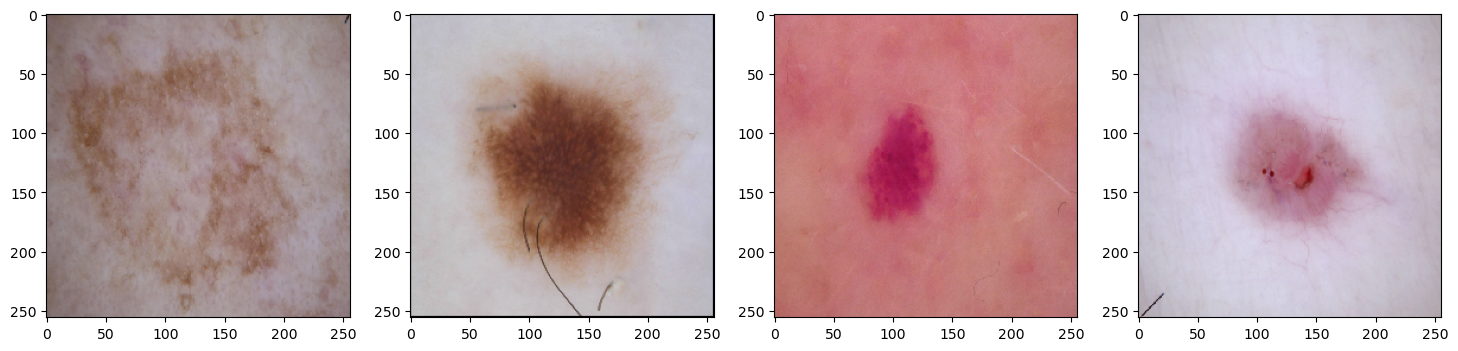

In [24]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True
)
imagegen = datagen.flow_from_directory(train_path, batch_size=1)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(imagegen.next()[0][0].astype('uint8'))
plt.show()

## Image Data Generator and Preprocess

In [25]:
aug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    horizontal_flip=True,
    brightness_range=[0.3, 0.8],
    width_shift_range=[-50, 0, 50, 30, -30],
    zoom_range=0.1,
    fill_mode="nearest",
)

noaug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

In [26]:
target_size = (224, 224)

train_generator = aug_datagen.flow_from_directory(
    train_path, class_mode="categorical", target_size=target_size, shuffle=True
)

valid_generator = noaug_datagen.flow_from_directory(
    valid_path,
    class_mode="categorical",
    target_size=target_size,
    shuffle=False,
)

Found 1411 images belonging to 9 classes.
Found 475 images belonging to 9 classes.


In [27]:
y_train = train_generator.labels
y_val = valid_generator.labels

## Class weight

In [28]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train ---> ", dict(zip(unique, counts)))

class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

Train --->  {0: 78, 1: 235, 2: 66, 3: 272, 4: 223, 5: 286, 6: 48, 7: 118, 8: 85}
{0: 2.00997150997151, 1: 0.6671394799054373, 2: 2.3754208754208754, 3: 0.5763888888888888, 4: 0.7030393622321873, 5: 0.5481740481740481, 6: 3.2662037037037037, 7: 1.3286252354048964, 8: 1.8444444444444446}
